In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
time.sleep(8*3600)

In [3]:
%matplotlib inline

## running the model

In [4]:
from Regard import init
args = init(verbose=1)
print('Parameters=', args)

path = '_Regard.pt'

Parameters= {'batch_size': 16, 'test_batch_size': 1, 'valid_size': 0.2, 'epochs': 60, 'do_adam': False, 'lr': 0.0065, 'momentum': 0.48, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 10, 'fullsize': 350, 'crop': 320, 'size': 280, 'mean': 0.36, 'std': 0.3, 'conv1_dim': 4, 'conv1_kernel_size': 7, 'conv2_dim': 13, 'conv2_kernel_size': 5, 'stride1': 4, 'stride2': 4, 'dimension': 25, 'verbose': 1}


In [5]:
!ls -l {path}
!rm {path}

-rw-r--r--  1 lolo  staff  342213 Jul 16 20:48 _Regard.pt


In [6]:
from Regard import ML
ml = ML(args)

import os
import torch
if os.path.isfile(path):
    ml.model.load_state_dict(torch.load(path))
    print('Loading file', path)
else:
    print('Training model...')
    ml.main()
    torch.save(ml.model.state_dict(), path) #save the neural network state
    print('Model saved at', path)

cuda? False
cuda? False
Found 796 sample images;  637  to train 159 to test
Training model...


	Train Epoch: 1 [0/637 (0%)]	Loss: 1.370701
	Train Epoch: 1 [160/637 (25%)]	Loss: 1.373139
	Train Epoch: 1 [320/637 (50%)]	Loss: 1.282718
	Train Epoch: 1 [480/637 (75%)]	Loss: 1.317134
	Train Epoch: 2 [0/637 (0%)]	Loss: 1.156294
	Train Epoch: 2 [160/637 (25%)]	Loss: 1.335860
	Train Epoch: 2 [320/637 (50%)]	Loss: 1.201325
	Train Epoch: 2 [480/637 (75%)]	Loss: 1.171474
	Train Epoch: 3 [0/637 (0%)]	Loss: 1.121343
	Train Epoch: 3 [160/637 (25%)]	Loss: 1.519571
	Train Epoch: 3 [320/637 (50%)]	Loss: 1.081121
	Train Epoch: 3 [480/637 (75%)]	Loss: 1.026578
	Train Epoch: 4 [0/637 (0%)]	Loss: 1.078356
	Train Epoch: 4 [160/637 (25%)]	Loss: 1.031801
	Train Epoch: 4 [320/637 (50%)]	Loss: 0.968439
	Train Epoch: 4 [480/637 (75%)]	Loss: 0.980237
	Train Epoch: 5 [0/637 (0%)]	Loss: 1.166162
	Train Epoch: 5 [160/637 (25%)]	Loss: 0.840839
	Train Epoch: 5 [320/637 (50%)]	Loss: 0.753537
	Train Epoch: 5 [480/637 (75%)]	Loss: 0.797495
	Train Epoch: 6 [0/637 (0%)]	Loss: 0.986620
	Train Epoch: 6 [160/637 (25%)]

	Train Epoch: 44 [480/637 (75%)]	Loss: 0.021551
	Train Epoch: 45 [0/637 (0%)]	Loss: 0.000984
	Train Epoch: 45 [160/637 (25%)]	Loss: 0.017166
	Train Epoch: 45 [320/637 (50%)]	Loss: 0.005706
	Train Epoch: 45 [480/637 (75%)]	Loss: 0.015856
	Train Epoch: 46 [0/637 (0%)]	Loss: 0.003179
	Train Epoch: 46 [160/637 (25%)]	Loss: 0.004609
	Train Epoch: 46 [320/637 (50%)]	Loss: 0.001925
	Train Epoch: 46 [480/637 (75%)]	Loss: 0.004065
	Train Epoch: 47 [0/637 (0%)]	Loss: 0.001637
	Train Epoch: 47 [160/637 (25%)]	Loss: 0.000521
	Train Epoch: 47 [320/637 (50%)]	Loss: 0.011185
	Train Epoch: 47 [480/637 (75%)]	Loss: 0.000280
	Train Epoch: 48 [0/637 (0%)]	Loss: 0.000883
	Train Epoch: 48 [160/637 (25%)]	Loss: 0.002676
	Train Epoch: 48 [320/637 (50%)]	Loss: 0.000967
	Train Epoch: 48 [480/637 (75%)]	Loss: 0.003561
	Train Epoch: 49 [0/637 (0%)]	Loss: 0.773800
	Train Epoch: 49 [160/637 (25%)]	Loss: 0.642305
	Train Epoch: 49 [320/637 (50%)]	Loss: 0.309423
	Train Epoch: 49 [480/637 (75%)]	Loss: 0.210887
	Train 

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.6330, Accuracy: 153/159 (96%)

Test set: Final Accuracy: 96.226%
Model saved at _Regard.pt


## testing the model

In [7]:
Accuracy = ml.test()

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 0.6330, Accuracy: 153/159 (96%)



target: left
pred  :center


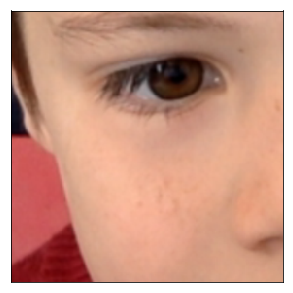

target: left
pred  :center


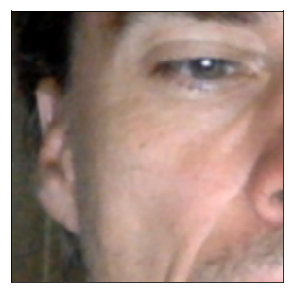

target: left
pred  :center


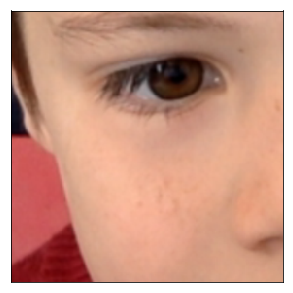

target: left
pred  :center


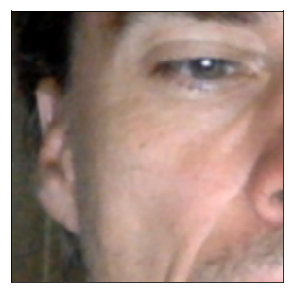

target: left
pred  :center


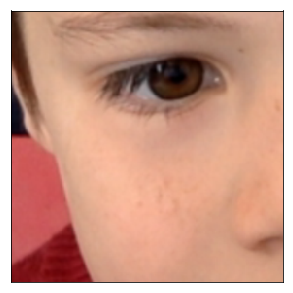

target: left
pred  :center


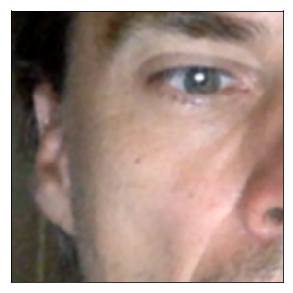

target:center
pred  :blink


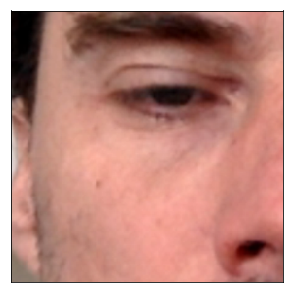

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

for data, labels in ml.dataset.test_loader:
    fig, ax = ml.show(only_wrong=True)
    plt.show() 


## cross-validation

/usr/local/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 93.082%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 96.855%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 94.340%
Test set: Final Accuracy: 94.340%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 98.113%
Test set: Final Accuracy: 94.969%
Test set: Final Accuracy: 91.195%
Test set: Final Accuracy: 96.226%
Test set: Final Accuracy: 97.484%
Test set: Final Accuracy: 95.597%
Test set: Fina

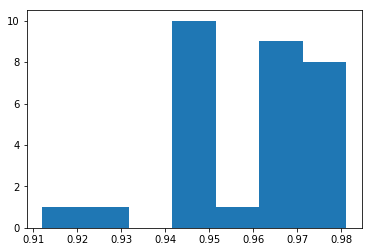

In [9]:
Accuracy = []
for _ in range(30):
    args = init(verbose=0, log_interval=0, seed=42+_)
    ml = ML(args)
    ml.main()
    Accuracy.append(ml.test())
print(Accuracy)

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(Accuracy, bins=7) 

plt.show() 